Last updated on Nov 5, 2023


# Demo script for the analyses done in Nakamura and Huang (2018, Science): using xarray

Companion notebook to [`demo_script_for_nh2018.ipynb`](demo_script_for_nh2018.ipynb), using the xarray interface.

In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from falwa.xarrayinterface import QGDataset

## Load ERA-Interim reanalysis data retrieved from ECMWF server

In [10]:
data = xr.open_mfdataset("2005-01-23_to_2005-01-30_[tuv].nc")


## Compute LWA diagnostics

The `QGDataset` automatically recognizes the variable names from ERA data and flips dimensions as required by the underlying `QGField` objects.

In [11]:
qgds = QGDataset(data)

uvtinterp = qgds.interpolate_fields()
refstates = qgds.compute_reference_states()
lwadiags  = qgds.compute_lwa_and_barotropic_fluxes()

    93818960       32759 -1167693888  converged at n =          950
    93818960       32759 -1167693888  converged at n =          721
    93818960       32759 -1167693888  converged at n =          953
    93818960       32759 -1167693888  converged at n =          721
    93818960       32759 -1167693888  converged at n =          949
    93818960       32759 -1167693888  converged at n =          703
    93818960       32759 -1167693888  converged at n =          948
    93818960       32759 -1167693888  converged at n =          711
    93818960       32759 -1167693888  converged at n =          949
    93818960       32759 -1167693888  converged at n =          718
    93818960       32759 -1167693888  converged at n =          948
    93818960       32759 -1167693888  converged at n =          721
    93818960       32759 -1167693888  converged at n =          946
    93818960       32759 -1167693888  converged at n =          706
    93818960       32759 -1167693888  converged 

## Visualize

In [12]:
selected_time = "2005-01-23 00:00:00"

selected_uvtinterp = uvtinterp.sel({ "time": selected_time, "height": 10000 })
selected_refstates = refstates.sel({ "time": selected_time })
selected_lwadiags  = lwadiags.sel({ "time": selected_time, "height": 10000 })

### 3D Variables on one pressure level to display

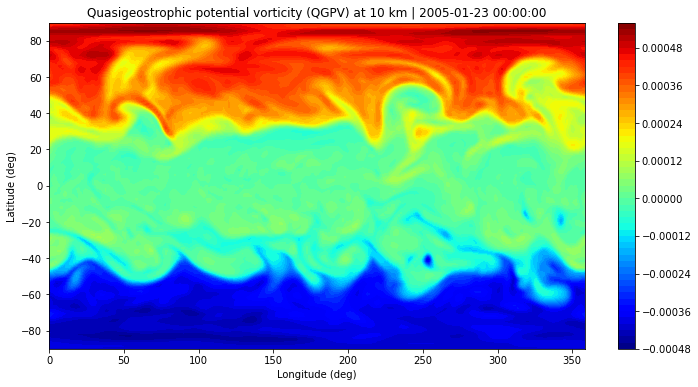

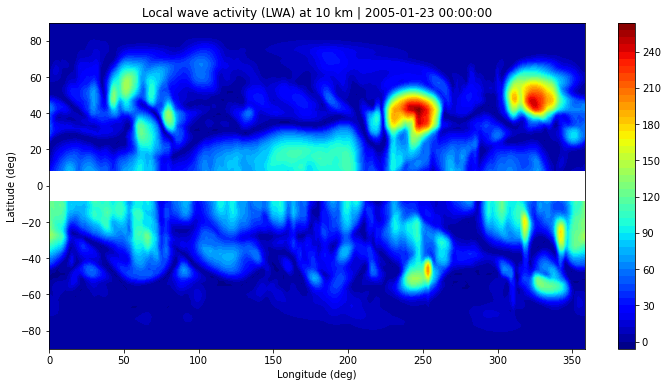

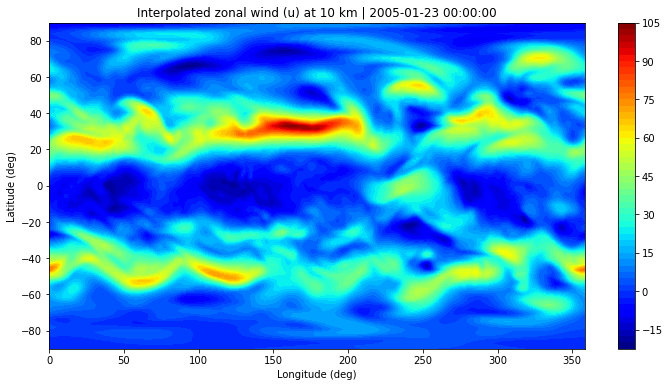

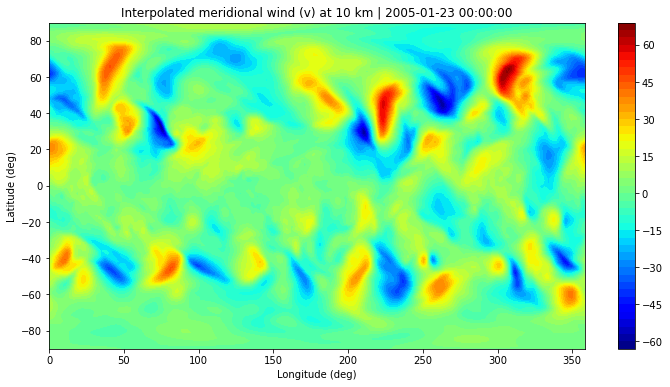

In [13]:
variables_3d = [
    (selected_uvtinterp["qgpv"], 'Quasigeostrophic potential vorticity (QGPV)'),
    (selected_lwadiags["lwa"], 'Local wave activity (LWA)'),
    (selected_uvtinterp["interpolated_u"], 'Interpolated zonal wind (u)'),
    (selected_uvtinterp["interpolated_v"], 'Interpolated meridional wind (v)')
]

for variable, name in variables_3d:
    plt.figure(figsize=(12, 6))
    plt.contourf(variable['xlon'], variable['ylat'], variable, 50, cmap='jet')
    if name == 'Local wave activity (LWA)':
        plt.axhline(y=0, c='w', lw=30)
    plt.colorbar()
    plt.ylabel('Latitude (deg)')
    plt.xlabel('Longitude (deg)')
    plt.title(f"{name} at 10 km | {selected_time}")

### Reference states to be displayed on y-z plane

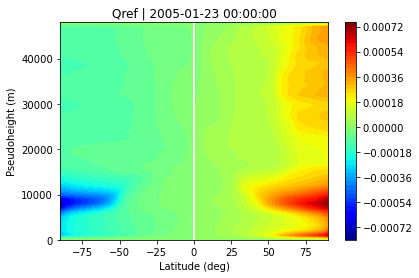

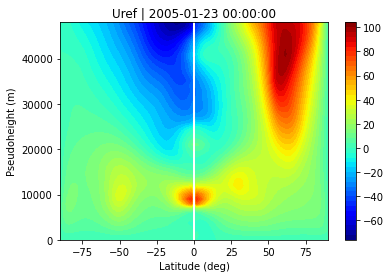

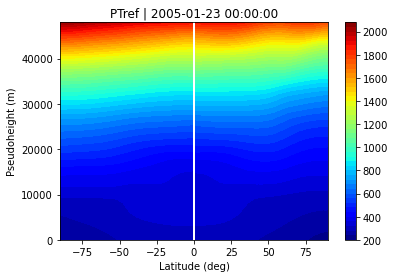

In [14]:
variables_yz = [
    (selected_refstates["qref"], 'Qref'),
    (selected_refstates["uref"], 'Uref'),
    (selected_refstates["ptref"], 'PTref')
]

for variable, name in variables_yz:
    plt.figure(figsize=(6, 4))
    plt.contourf(variable['ylat'], variable['height'], variable, 50, cmap='jet')
    plt.axvline(x=0, c='w', lw=2)
    plt.xlabel('Latitude (deg)')
    plt.ylabel('Pseudoheight (m)')
    plt.colorbar()
    plt.title(f'{name} | {selected_time}')

### Vertically averaged variables to be displayed on x-y plane

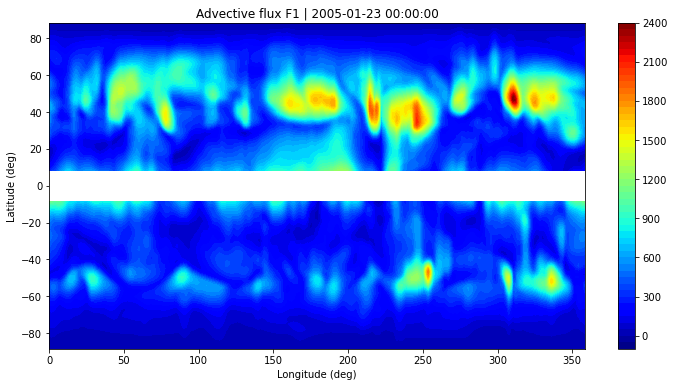

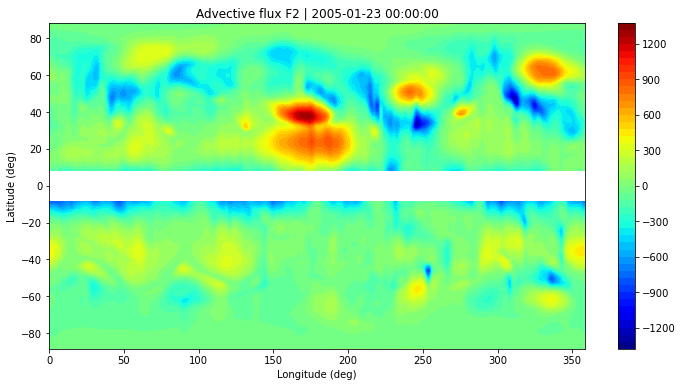

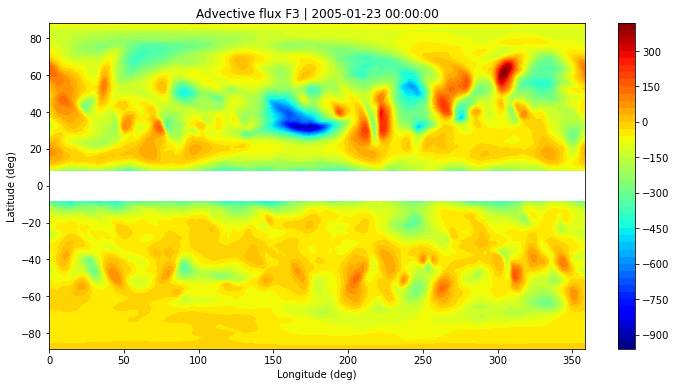

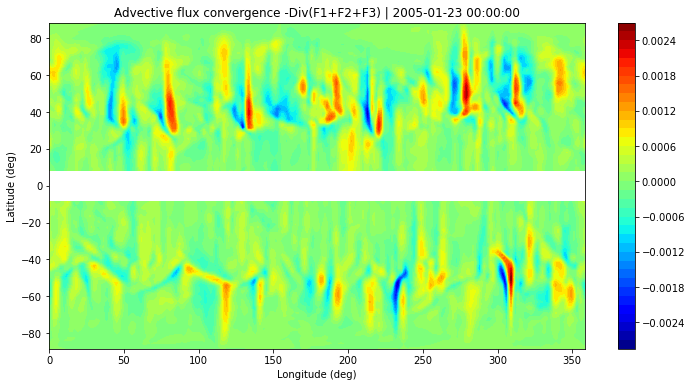

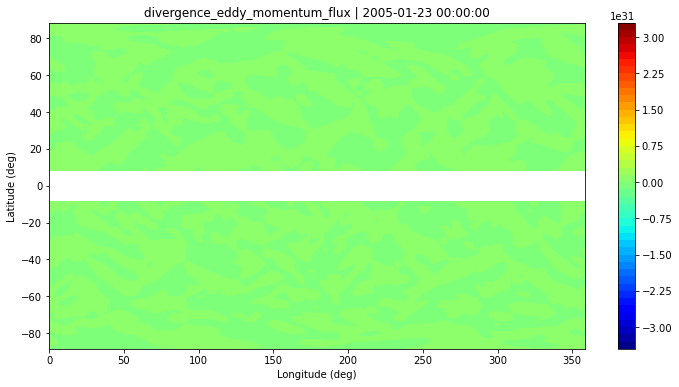

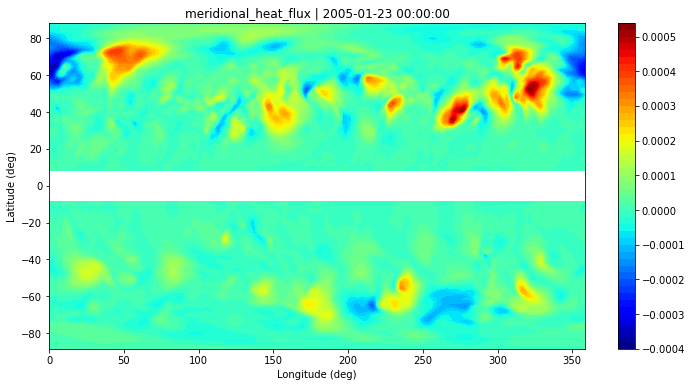

In [15]:
variables_xy = [
    (selected_lwadiags["adv_flux_f1"], 'Advective flux F1'),
    (selected_lwadiags["adv_flux_f2"], 'Advective flux F2'),
    (selected_lwadiags["adv_flux_f3"], 'Advective flux F3'),
    (selected_lwadiags["convergence_zonal_advective_flux"], 'Advective flux convergence -Div(F1+F2+F3)'),
    (selected_lwadiags["divergence_eddy_momentum_flux"], 'divergence_eddy_momentum_flux'),
    (selected_lwadiags["meridional_heat_flux"], 'meridional_heat_flux')
]

for variable, name in variables_xy:
    plt.figure(figsize=(12, 6))
    plt.contourf(variable['xlon'], variable['ylat'][1:-1], variable[1:-1, :], 50, cmap='jet')
    plt.axhline(y=0, c='w', lw=30)
    plt.ylabel('Latitude (deg)')
    plt.xlabel('Longitude (deg)')
    plt.colorbar()
    plt.title(f'{name} | {selected_time}')
    plt.show()

## Write to disk

Write with xarray's [`to_netcdf`](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.to_netcdf.html).

In [16]:
xr.merge([uvtinterp, refstates, lwadiags]).to_netcdf("2005-01-23_to_2005-01-30_output_xr.nc")

To reduce the file size, compression and/or integer-based value packing can be added by specifying an appropriate `encoding` for the variables.